In [36]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

import plotly.express as px

## Data Preprocessing

In [45]:
# Reading the data
df = pd.read_csv('Steel_industry_data.csv')
df.drop(columns=['NSM'], inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh', 'CO2(tCO2)' : 'CO2'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df.set_index('date', inplace=True)
df_num = df.select_dtypes(include=['number'])
df_num_hourly = df_num.resample('h').mean()
display(df)

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,Weekday,Monday,Light_Load
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,Weekday,Monday,Light_Load
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,Weekday,Monday,Light_Load
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,Weekday,Monday,Light_Load
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,Weekday,Monday,Light_Load
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,Weekday,Monday,Light_Load
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,Weekday,Monday,Light_Load


In [38]:
display(df_num)

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00
...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98


In [39]:
# Analyzing CO2 data
df['CO2'].value_counts()

CO2
0.00    20990
0.02     4643
0.03     4261
0.04     1834
0.01     1512
0.05     1363
0.06      410
0.07       27
Name: count, dtype: int64

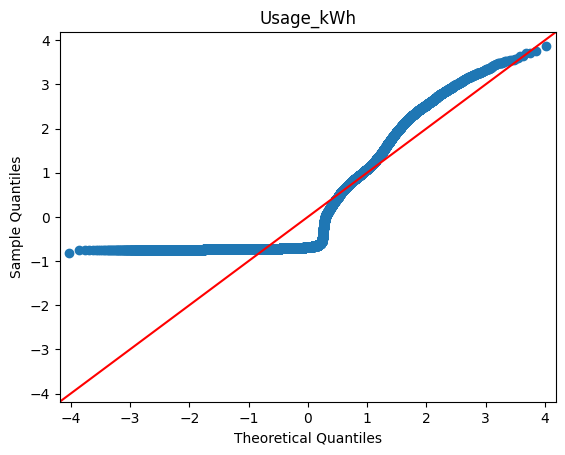

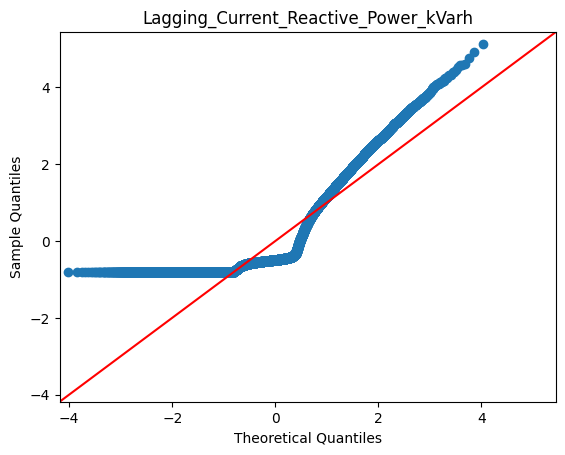

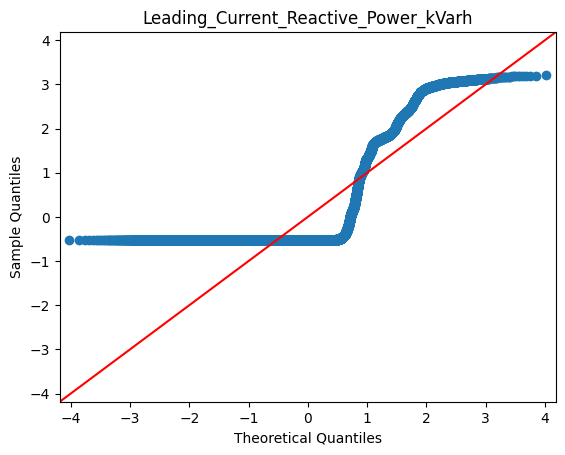

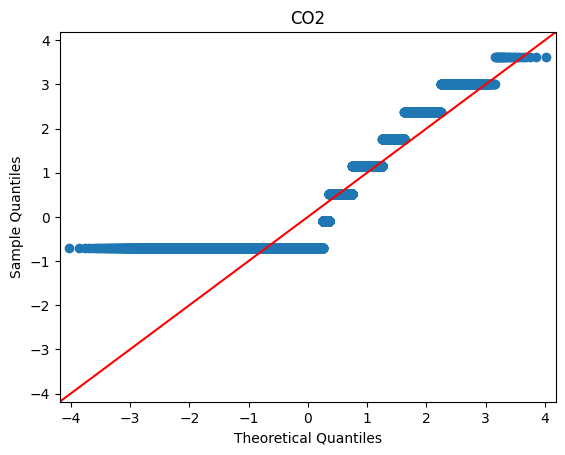

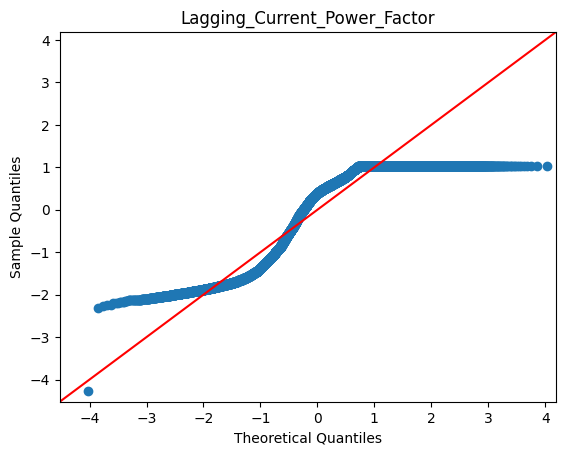

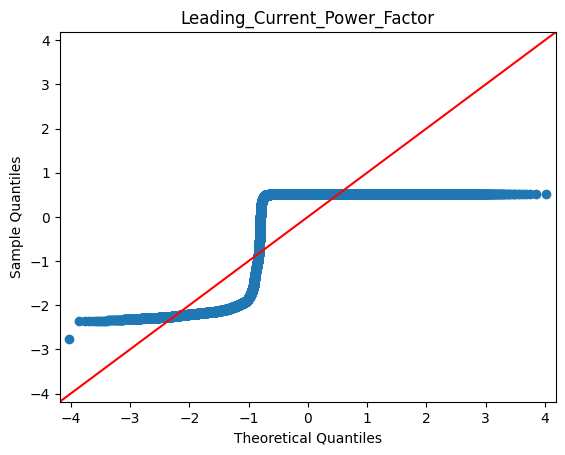

In [48]:
# check normality of df_num by qq plot
for col in df_num.columns:
    sm.qqplot(df_num[col], line ='45', fit = True)
    plt.title(col)
    plt.show()

In [40]:
# Resampling the data to daily level as the original data does not look normal
df_num_daily = df_num.resample('D').mean()
df_num_daily 

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
2018-01-01,3.665208,1.735625,9.885000,0.000000,85.299375,57.076146
2018-01-02,41.150312,16.454479,3.063125,0.000000,84.207292,92.138125
2018-01-03,37.094271,13.391562,2.766562,0.015938,86.100000,92.617292
2018-01-04,51.851250,21.449063,2.339271,0.022604,84.128125,93.423750
2018-01-05,48.785417,20.422917,2.689167,0.021250,84.063021,92.862813
...,...,...,...,...,...,...
2018-12-27,27.227812,9.291250,2.440313,0.011146,89.655625,93.456667
2018-12-28,19.151875,6.244896,5.999062,0.007500,91.931562,81.060833
2018-12-29,3.931458,1.250417,9.224375,0.000104,90.275417,57.799271


In [41]:
# normalize df_num_daily
df_num_daily_norm = (df_num_daily - df_num_daily.mean())/df_num_daily.std()
df_num_daily_norm

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
2018-01-01,-1.538524,-1.520027,2.135493,-1.563939,0.853128,-1.953859
2018-01-02,0.892658,0.459932,-0.286845,-1.563939,0.655792,0.556285
2018-01-03,0.629594,0.047913,-0.392150,0.598914,0.997799,0.590590
2018-01-04,1.586691,1.131795,-0.543874,1.503637,0.641487,0.648325
2018-01-05,1.387850,0.993760,-0.419632,1.319865,0.629723,0.608167
...,...,...,...,...,...,...
2018-12-27,-0.010317,-0.503655,-0.507996,-0.051355,1.640289,0.650682
2018-12-28,-0.534101,-0.913446,0.755659,-0.546126,2.051544,-0.236756
2018-12-29,-1.521255,-1.585296,1.900915,-1.549802,1.752284,-1.902089


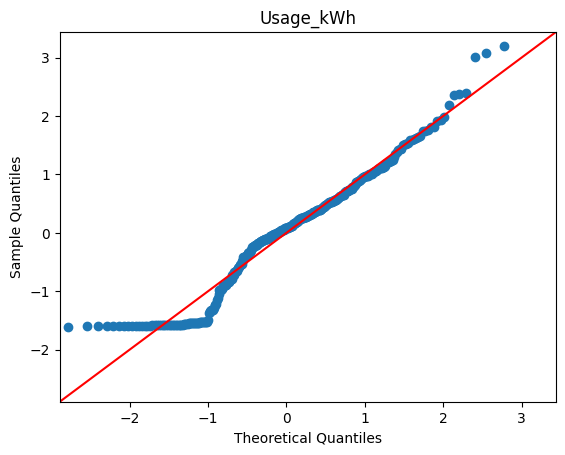

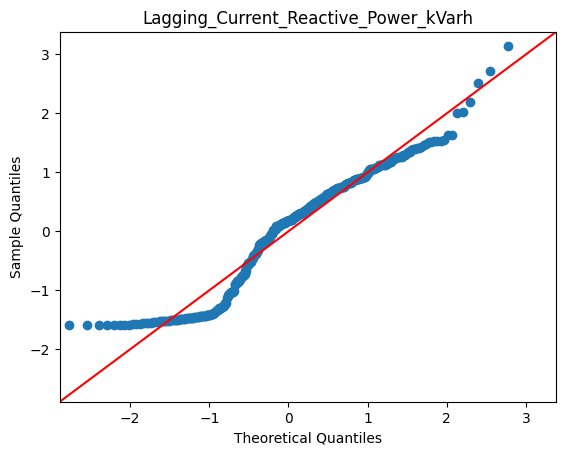

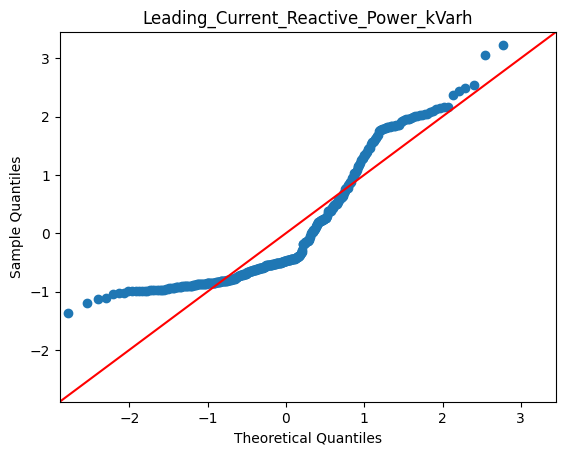

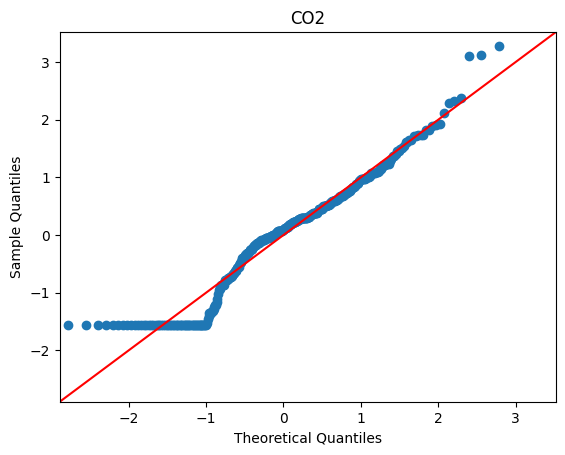

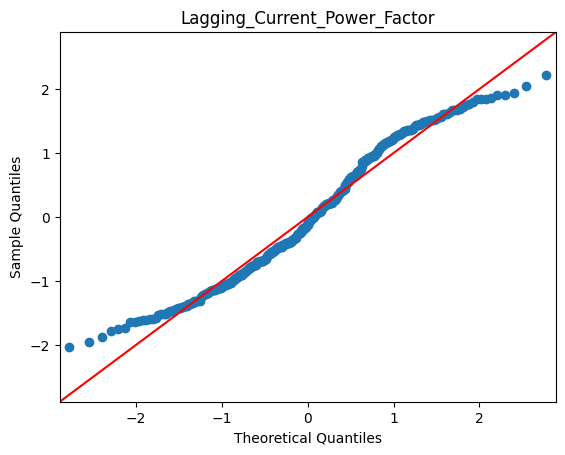

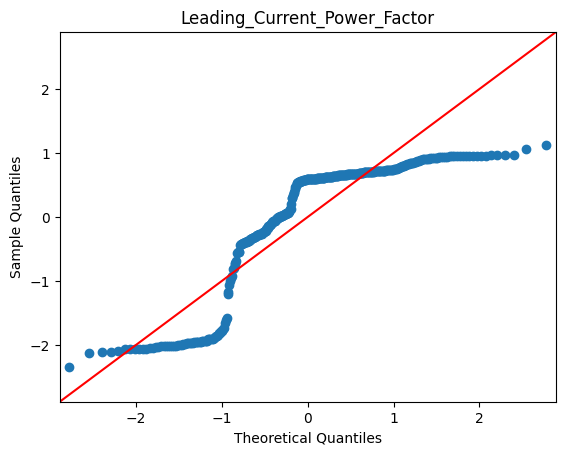

In [49]:
# check normality of df_num_daily by qq plot
for col in df_num_daily.columns:
    sm.qqplot(df_num_daily[col], line ='45', fit = True)
    plt.title(col)
    plt.show()

364
19
[2.23394318 1.73871701 2.34230156 2.01109933 2.80099066]
2.117531913719983


Text(0.5, 1.0, 'Multivariate QQ plot using Mahalanobis distance')

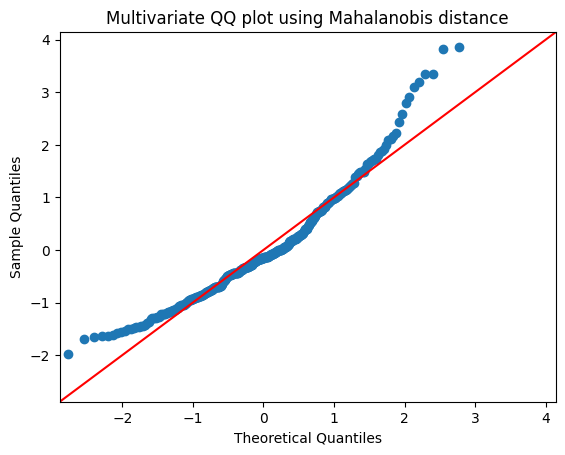

In [10]:
# multivariate qq pplot using mahalanobis distance
from scipy.spatial.distance import mahalanobis
# calculate the mahalanobis distance
dist = []
for i in list(range(0, 1)) + list(range(2, len(df_num_daily))):
    dist.append(mahalanobis(df_num_daily.iloc[i], np.zeros(6), np.linalg.inv(np.cov(df_num_daily.T))))
dist = np.array(dist)
print(len(dist))
print(np.array(dist).argmax())

print(dist[:5])
print(dist.mean())

# # remove max element from dist
dist = np.delete(dist, np.array(dist).argmax())

# plot the qq plot
sm.qqplot(dist, line ='45', fit = True)
plt.title('Multivariate QQ plot using Mahalanobis distance')

In [11]:
px.line(df_num_daily['Usage_kWh'], labels={'index':'Date', 'value':'Usage_kWh'}, title='Usage Data Overview')

In [12]:
# generate summary statistics for df_num_daily with values rounded off to 2 decimal places



In [13]:
# generate correlation matrix for df

In [14]:
# normality test
# Shapiro-Wilk test
stat, p = stats.shapiro(dist)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.945, p=0.000
Sample does not look Gaussian (reject H0)


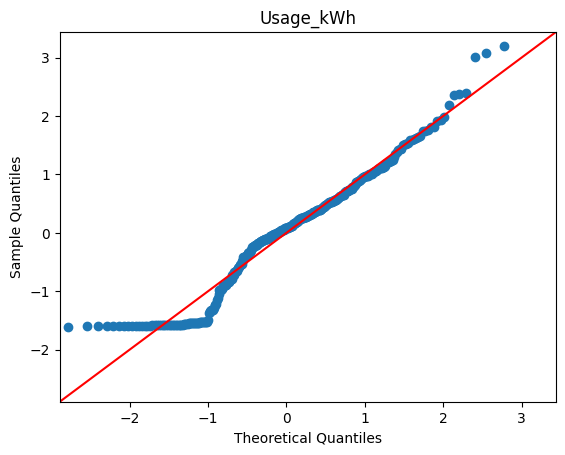

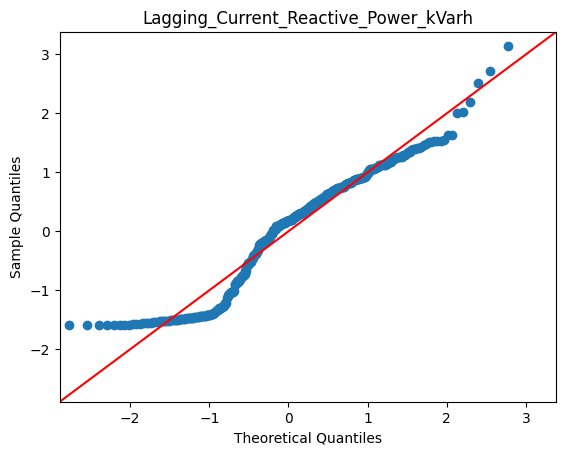

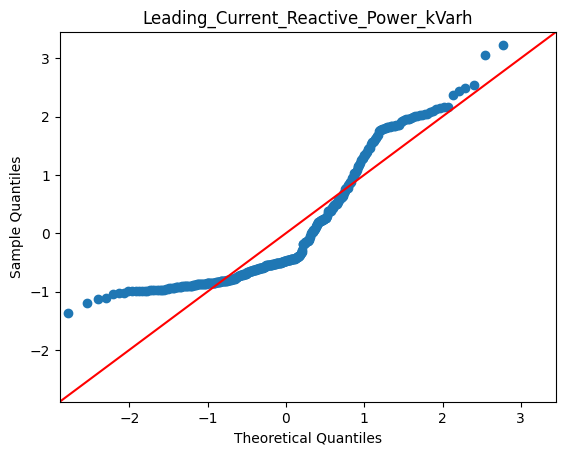

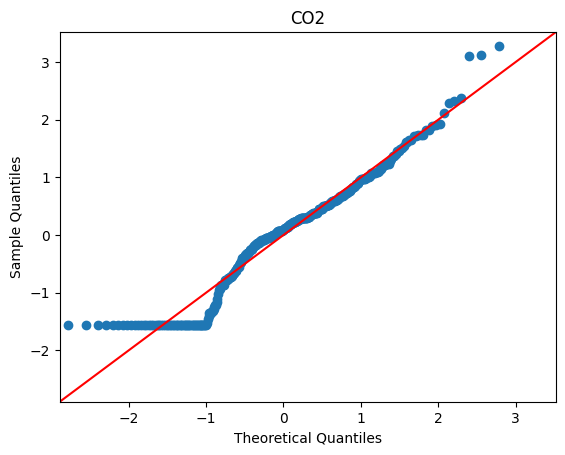

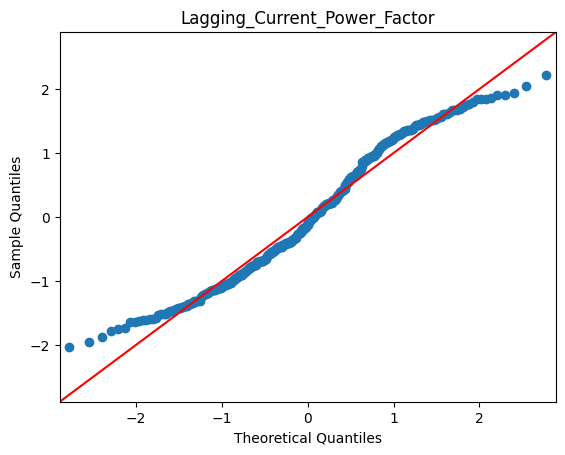

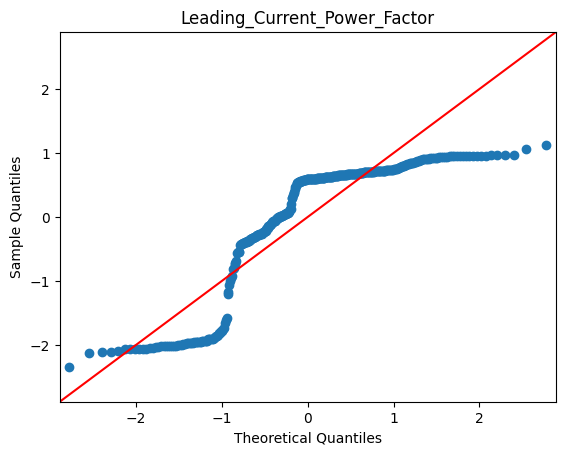

In [15]:
# check normality of df_num by qq plot


for col in df_num_daily.columns:
    sm.qqplot(df_num_daily[col], line ='45', fit = True)
    plt.title(col)
    plt.show()

In [16]:
# plotly monthly average values against month of df_num
import plotly.express as px

df_temp = df_num.copy()

df_temp = df_temp.groupby(df_temp.index.month).mean()

px.line(df_temp, labels={'value':'Average value', 'index':'Month'}, title='Monthly average values of df_num')

In [17]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Assuming df_num is your DataFrame and it has been defined earlier
X = df_num.drop('Usage_kWh', axis=1)
y = df_num['Usage_kWh']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 3.462e+05
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:09:00   Log-Likelihood:                 18963.
No. Observations:               35040   AIC:                        -3.791e+04
Df Residuals:                   35034   BIC:                        -3.786e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [18]:
df_num.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor'],
      dtype='object')

In [19]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Assuming df_num is your DataFrame and it has been defined earlier
# Define the formula for the linear regression model
formula = 'Usage_kWh ~ ' + ' + '.join(df_num.columns.difference(['Usage_kWh']))

# Fit the model using the formula API
model = smf.ols(formula, data=df_num).fit()

# Print the summary of the model
print(model.summary())

# Get the ANOVA table
anova_table = sms.anova_lm(model, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 3.462e+05
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:09:00   Log-Likelihood:                 18963.
No. Observations:               35040   AIC:                        -3.791e+04
Df Residuals:                   35034   BIC:                        -3.786e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## Divide the data into 2 populations

In [20]:
# divide the data into winter and summer
df_summer = df_num_daily[df_num_daily.index.quarter.isin([2,3])]
df_winter = df_num_daily[df_num_daily.index.quarter.isin([1,4])]
# randomly divide the data into winter and summer
# df_summer = df_num_daily.sample(frac=0.5)
# df_winter = df_num_daily.drop(df_summer.index)
display(df_summer.describe())
display(df_winter.describe())

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,-0.183785,-0.090859,-0.003359,-0.163133,-0.464142,-0.077183
std,0.838793,0.896120,0.893887,0.830893,0.640307,0.969523
min,-1.600949,-1.586389,-1.031338,-1.563939,-1.877203,-2.342087
25%,-0.836565,-0.941513,-0.645017,-0.765238,-0.937306,-0.408405
50%,-0.023174,0.133402,-0.458950,0.005190,-0.481827,0.541989
75%,0.388801,0.611132,0.546529,0.393938,0.019908,0.626587
max,1.513004,1.514360,2.161976,1.461228,1.192820,0.903602


,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.184795,0.091359,0.003377,0.164029,0.466692,0.077607
std,1.111351,1.089423,1.098899,1.123785,1.077951,1.026549
min,-1.597726,-1.593563,-1.362786,-1.563939,-2.024772,-2.092374
25%,-0.549557,-0.878443,-0.847933,-0.595603,-0.407238,-0.263459
50%,0.268535,0.209503,-0.509401,0.259643,0.824414,0.649504
75%,0.905112,0.878967,0.549812,0.892242,1.346563,0.759699
max,3.191990,3.137130,3.213357,3.270673,2.215414,1.119070


## Test for Equivalence of Mean

In [21]:
# test for multivariate equivalence of mean in summer and winter
# Hotelling's T-squared test
from scipy.stats import f
from scipy.stats import t

# calculate the mean of the two groups
mean_summer = df_summer.mean()
mean_winter = df_winter.mean()

# calculate the covariance matrix of the two groups
cov_summer = np.cov(df_summer.T)
cov_winter = np.cov(df_winter.T)

# calculate the number of samples in each group
n_summer = len(df_summer)
n_winter = len(df_winter)

# calculate the number of variables
p = len(df_summer.columns)

# calculate the pooled covariance matrix
cov_pooled = ((n_summer - 1)*cov_summer + (n_winter - 1)*cov_winter)/(n_summer + n_winter - 2)

# calculate the T-squared statistic
hotelling = n_summer*n_winter/(n_summer + n_winter)*np.dot(np.dot(mean_summer - mean_winter, np.linalg.inv(cov_pooled)), mean_summer - mean_winter)

# calculate the F-statistic
f_statistic = hotelling*(n_summer + n_winter - p - 1)/(p*(n_summer + n_winter - 2))

# calculate the critical value of the F-statistic
alpha = 0.05

f_critical = f.ppf(1 - alpha, p, n_summer + n_winter - p - 1)

# calculate the p-value
p_value = 1 - f.cdf(f_statistic, p, n_summer + n_winter - p - 1)

print('Hotelling T-squared statistic:', hotelling)
print('F-statistic:', f_statistic)
print('Critical value of F-statistic:', f_critical)
print('P-value:', p_value)

if f_statistic > f_critical:
    print('Reject the null hypothesis that the means are equal')
else:
    print('Fail to reject the null hypothesis that the means are equal')

Hotelling T-squared statistic: 138.07169032050348
F-statistic: 22.694979400707183
Critical value of F-statistic: 2.1239225395551817
P-value: 1.1102230246251565e-16
Reject the null hypothesis that the means are equal


## Test for Equivalence of Variance

In [22]:
import numpy as np
from scipy.stats import chi2

def wilks_lambda_test(df_summer, df_winter, alpha=0.05):
    """
    Performs Wilks' Lambda test to compare covariance matrices between two groups
    using the formula: -2log∧ = -np log(n) + n log(|A|) + Σ ni_p log(ni) + Σ ni log(|Ai|)
    
    Parameters:
    df_summer (pandas.DataFrame): Data frame containing summer measurements
    df_winter (pandas.DataFrame): Data frame containing winter measurements
    alpha (float): Significance level for the test
    
    Returns:
    dict: Test statistics and results
    """
    # Calculate sample sizes
    n1 = len(df_summer)
    n2 = len(df_winter)
    n = n1 + n2  # total sample size
    
    # Number of variables
    p = len(df_summer.columns)
    
    # Calculate individual covariance matrices and their determinants
    A1 = (n1 - 1) * np.cov(df_summer.T)  # As per formula Ai = (ni-1)cov
    A2 = (n2 - 1) * np.cov(df_winter.T)
    
    # Calculate |A| (determinant of sum of matrices)
    A = A1 + A2
    det_A = np.linalg.det(A)
    det_A1 = np.linalg.det(A1)
    det_A2 = np.linalg.det(A2)
    
    # Calculate Wilks' Lambda statistic using the formula from the image
    wilks_stat = -n * p * np.log(n) + \
                 n * np.log(det_A) + \
                 n1 * p * np.log(n1) + \
                 n2 * p * np.log(n2) - \
                 n1 * np.log(det_A1) - \
                 n2 * np.log(det_A2)

    # Degrees of freedom calculation as shown in image
    # (g-1)p(p+1)/2 where g=2 (number of groups)
    df = (2-1) * p * (p+1) / 2
    
    # Calculate p-value using chi-square distribution
    p_value = 1 - chi2.cdf(wilks_stat, df)
    
    # Calculate critical value
    chi2_critical = chi2.ppf(1 - alpha, df)
    
    results = {
        'wilks_lambda_stat': wilks_stat,
        'degrees_of_freedom': df,
        'chi2_critical': chi2_critical,
        'p_value': p_value,
        'equal_covariance': p_value > alpha
    }
    
    return results

def print_wilks_test_results(results):
    """
    Pretty prints the results of the Wilks' Lambda test
    """
    print("\nWilks' Lambda Test Results:")
    print("-" * 40)
    print(f"Test statistic (-2 log Λ): {results['wilks_lambda_stat']:.4f}")
    print(f"Degrees of freedom: {results['degrees_of_freedom']:.0f}")
    print(f"Critical value (χ²): {results['chi2_critical']:.4f}")
    print(f"P-value: {results['p_value']:.4f}")
    print("\nConclusion:")
    if results['equal_covariance']:
        print("Fail to reject null hypothesis: Covariance matrices are not significantly different")
    else:
        print("Reject null hypothesis: Covariance matrices are significantly different")

In [23]:
print_wilks_test_results(wilks_lambda_test(df_summer, df_winter))


Wilks' Lambda Test Results:
----------------------------------------
Test statistic (-2 log Λ): 544.7142
Degrees of freedom: 21
Critical value (χ²): 32.6706
P-value: 0.0000

Conclusion:
Reject null hypothesis: Covariance matrices are significantly different


## MANOVA

In [24]:
import pandas as pd
import numpy as np
from scipy import stats

def perform_manova(df_summer, df_winter):
    """
    Perform MANOVA analysis on two groups of multivariate data using Wilk's test.
    
    Parameters:
    df_summer (pd.DataFrame): DataFrame containing summer measurements
    df_winter (pd.DataFrame): DataFrame containing winter measurements
    
    Returns:
    dict: Dictionary containing test statistics and p-value
    """
    # Convert DataFrames to numpy arrays for statistical processing
    summer_data = df_summer.values
    winter_data = df_winter.values
    
    # Combine the data and create group labels
    X = np.vstack([summer_data, winter_data])
    groups = np.repeat([0, 1], [len(summer_data), len(winter_data)])
    
    # Calculate the number of variables
    n_vars = X.shape[1]
    
    # Calculate group means
    summer_mean = np.mean(summer_data, axis=0)
    winter_mean = np.mean(winter_data, axis=0)
    grand_mean = np.mean(X, axis=0)
    
    # Calculate Within-group Sum of Squares and Cross-products (W)
    W = np.zeros((n_vars, n_vars))
    for i in range(len(groups)):
        if groups[i] == 0:
            diff = X[i] - summer_mean
        else:
            diff = X[i] - winter_mean
        W += np.outer(diff, diff)
    
    # Calculate Between-group Sum of Squares and Cross-products (B)
    B = np.zeros((n_vars, n_vars))
    for mean, size in [(summer_mean, len(summer_data)), (winter_mean, len(winter_data))]:
        diff = mean - grand_mean
        B += size * np.outer(diff, diff)
    
    # Calculate Wilk's lambda statistic
    _, W_det = np.linalg.slogdet(W)
    _, T_det = np.linalg.slogdet(W + B)
    wilks_lambda = np.exp(W_det - T_det)
    
    # Calculate degrees of freedom
    df1 = 1
    df2 = len(X) - 2
    
    # Calculate F-statistic
    F = ((1 - wilks_lambda) / wilks_lambda) * (df2 / df1)
    
    # Calculate p-value
    p_value = 1 - stats.f.cdf(F, df1, df2)
    
    # Create summary statistics
    results = {
        'wilks_lambda': wilks_lambda,
        'F_statistic': F,
        'df1': df1,
        'df2': df2,
        'p_value': p_value,
        'group_sizes': {
            'summer': len(summer_data),
            'winter': len(winter_data)
        },
        'group_means': {
            'summer': summer_mean,
            'winter': winter_mean
        }
    }
    
    return results

def print_manova_results(results):
    """
    Print MANOVA results in a formatted way.
    
    Parameters:
    results (dict): Dictionary containing MANOVA results
    """
    print("\nMANOVA Results:")
    print("-" * 50)
    print(f"Wilk's Lambda: {results['wilks_lambda']:.4f}")
    print(f"F-statistic: {results['F_statistic']:.4f}")
    print(f"Degrees of freedom: ({results['df1']}, {results['df2']})")
    print(f"p-value: {results['p_value']:.4f}")
    print("\nGroup Sizes:")
    print(f"Summer: {results['group_sizes']['summer']}")
    print(f"Winter: {results['group_sizes']['winter']}")
    
    print("\nGroup Means:")
    print("\nSummer:")
    for i, mean in enumerate(results['group_means']['summer']):
        print(f"Variable {i+1}: {mean:.4f}")
    print("\nWinter:")
    for i, mean in enumerate(results['group_means']['winter']):
        print(f"Variable {i+1}: {mean:.4f}")

In [25]:
print_manova_results(perform_manova(df_summer, df_winter))


MANOVA Results:
--------------------------------------------------
Wilk's Lambda: 0.7244
F-statistic: 138.0717
Degrees of freedom: (1, 363)
p-value: 0.0000

Group Sizes:
Summer: 183
Winter: 182

Group Means:

Summer:
Variable 1: -0.1838
Variable 2: -0.0909
Variable 3: -0.0034
Variable 4: -0.1631
Variable 5: -0.4641
Variable 6: -0.0772

Winter:
Variable 1: 0.1848
Variable 2: 0.0914
Variable 3: 0.0034
Variable 4: 0.1640
Variable 5: 0.4667
Variable 6: 0.0776


## Profile Analysis

In [26]:
# Profile Analysis
# from df_num make a df for mean of each column for time in AM for each month
df_am = df_num[df_num.index.hour < 12]
df_am = df_am.resample('M').mean()
# make index month
df_am.index = df_am.index.month
display(df_am)

df_pm = df_num[df_num.index.hour >= 12]
df_pm = df_pm.resample('M').mean()
# make index month
df_pm.index = df_pm.index.month
display(df_pm)

/var/folders/4c/4wxkspdj41ldvljhskhz0kwr0000gn/T/ipykernel_21283/560012285.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
1,0.170127,0.294770,-0.408329,0.154870,-0.077621,0.423381
2,-0.085437,0.002296,-0.337542,-0.106354,-0.130302,0.324830
3,-0.199253,-0.118046,-0.436687,-0.200067,-0.369954,0.445797
4,-0.194405,-0.061634,-0.462921,-0.188541,-0.519427,0.452040
5,-0.238826,-0.024000,-0.408033,-0.230027,-0.727710,0.398859
6,-0.312183,-0.087739,-0.424247,-0.296035,-0.907699,0.406300
7,-0.206554,0.033977,-0.437512,-0.189664,-0.638705,0.336005
8,-0.284519,-0.008692,-0.384676,-0.271221,-1.029585,0.341207
9,-0.370587,-0.135111,-0.419287,-0.344192,-1.073599,0.359964


/var/folders/4c/4wxkspdj41ldvljhskhz0kwr0000gn/T/ipykernel_21283/560012285.py:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
1,0.728791,0.350973,0.422437,0.664598,0.688806,-0.187543
2,0.483249,0.036681,0.469685,0.487011,0.759976,-0.341134
3,0.173673,-0.161175,0.549107,0.172763,0.662565,-0.324509
4,0.192236,-0.057765,0.551096,0.195426,0.619318,-0.385228
5,0.189714,0.009061,0.520688,0.197313,0.574871,-0.448639
6,0.032498,-0.110212,0.540209,0.034186,0.561860,-0.527671
7,0.209991,0.002403,0.287973,0.219782,0.626742,-0.305682
8,0.024419,-0.015609,0.347548,0.027542,0.479926,-0.513434
9,-0.065278,-0.049944,0.276088,-0.054389,0.401641,-0.539189


In [27]:
import numpy as np
from scipy import stats

def profile_analysis(df_am, df_pm):
    """
    Perform profile analysis tests on two populations.
    
    Parameters:
    df_am, df_pm: pandas DataFrames containing the multivariate observations
                 for the two populations
    
    Returns:
    dict: Results of the three profile analysis tests
    """
    # Convert DataFrames to numpy arrays for easier manipulation
    X1 = df_am.values
    X2 = df_pm.values
    
    # Sample sizes
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    
    # Number of variables (p)
    p = X1.shape[1]
    
    # Calculate means
    X1_bar = np.mean(X1, axis=0)
    X2_bar = np.mean(X2, axis=0)
    
    # 1. Test for Parallel Profiles
    # Construct contrast matrix C
    C = np.zeros((p-1, p))
    for i in range(p-1):
        C[i, i] = -1
        C[i, i+1] = 1
    
    # Calculate pooled covariance matrix
    S_pooled = ((n1-1)*np.cov(X1, rowvar=False) + (n2-1)*np.cov(X2, rowvar=False))/(n1+n2-2)
    
    # Calculate T² statistic for parallel profiles
    diff = X1_bar - X2_bar
    C_diff = C @ diff
    CS_pooled_C = C @ S_pooled @ C.T
    T2_parallel = n1*n2/(n1+n2) * C_diff.T @ np.linalg.inv(CS_pooled_C) @ C_diff
    
    # Critical value for parallel test
    df1 = p-1
    df2 = n1+n2-p
    F_critical_parallel = stats.f.ppf(0.95, df1, df2)
    c2_parallel = (n1+n2-2)*(p-1)/(n1+n2-p) * F_critical_parallel
    
    # 2. Test for Coincident Profiles (given parallel)
    # Sum of observations
    sum1 = np.sum(X1_bar)
    sum2 = np.sum(X2_bar)
    
    # Calculate pooled variance of sums
    S_pooled_sums = np.sum(S_pooled)
    
    # T² statistic for coincident profiles
    T2_coincident = (n1*n2/(n1+n2)) * ((sum1-sum2)**2)/(p**2 * S_pooled_sums)
    
    # Critical value for coincident test
    F_critical_coincident = stats.f.ppf(0.95, 1, n1+n2-2)
    
    # 3. Test for Level Profiles (given coincident)
    # Calculate overall mean
    X_bar = (n1*X1_bar + n2*X2_bar)/(n1+n2)
    
    # Calculate test statistic for level profiles
    S = ((n1-1)*np.cov(X1, rowvar=False) + (n2-1)*np.cov(X2, rowvar=False))/(n1+n2-1)
    T2_level = (n1+n2) * X_bar.T @ C.T @ np.linalg.inv(C @ S @ C.T) @ C @ X_bar
    
    # Critical value for level test
    df1_level = p-1
    df2_level = n1+n2-p+1
    F_critical_level = stats.f.ppf(0.95, df1_level, df2_level)
    c2_level = (n1+n2-1)*(p-1)/(n1+n2-p+1) * F_critical_level
    
    results = {
        'parallel': {
            'T2': T2_parallel,
            'critical_value': c2_parallel,
            'reject_H0': T2_parallel > c2_parallel
        },
        'coincident': {
            'T2': T2_coincident,
            'critical_value': F_critical_coincident,
            'reject_H0': T2_coincident > F_critical_coincident
        },
        'level': {
            'T2': T2_level,
            'critical_value': c2_level,
            'reject_H0': T2_level > c2_level
        }
    }

    print(results)
    
    return results

In [28]:
profile_analysis(df_am, df_pm)

{'parallel': {'T2': 977.8340710665872, 'critical_value': 16.945213712764513, 'reject_H0': True}, 'coincident': {'T2': 1.4040164734155551, 'critical_value': 4.300949501777657, 'reject_H0': False}, 'level': {'T2': 0.0030756497608397703, 'critical_value': 16.58455880493761, 'reject_H0': False}}


{'parallel': {'T2': 977.8340710665872,
  'critical_value': 16.945213712764513,
  'reject_H0': True},
 'coincident': {'T2': 1.4040164734155551,
  'critical_value': 4.300949501777657,
  'reject_H0': False},
 'level': {'T2': 0.0030756497608397703,
  'critical_value': 16.58455880493761,
  'reject_H0': False}}

## PCA

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca_analysis(data, n_components=None):
    """
    Perform PCA on the input data and create a scree plot
    
    Parameters:
    data (numpy.ndarray): Input data matrix (samples × features)
    n_components (int): Number of components to keep (default: None, keeps all components)
    
    Returns:
    tuple: (pca_object, transformed_data, explained_variance_ratio)
    """
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    data_transformed = pca.fit_transform(data_scaled)
    
    # Calculate cumulative explained variance
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Create scree plot
    plt.figure(figsize=(10, 6))
    
    # line plot of explained variance ratio
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_,
             marker='o',
             label='Individual explained variance')
    # plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
    #         pca.explained_variance_ratio_,
    #         alpha=0.5,
    #         align='center',
    #         label='Individual explained variance')
    
    # Line plot of cumulative explained variance ratio
    plt.step(range(1, len(cumulative_variance_ratio) + 1),
             cumulative_variance_ratio,
             where='mid',
             label='Cumulative explained variance')
    
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Add percentage labels on top of each bar
    for i, v in enumerate(pca.explained_variance_ratio_):
        plt.text(i + 1, v, f'{v:.1%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return pca, data_transformed, pca.explained_variance_ratio_

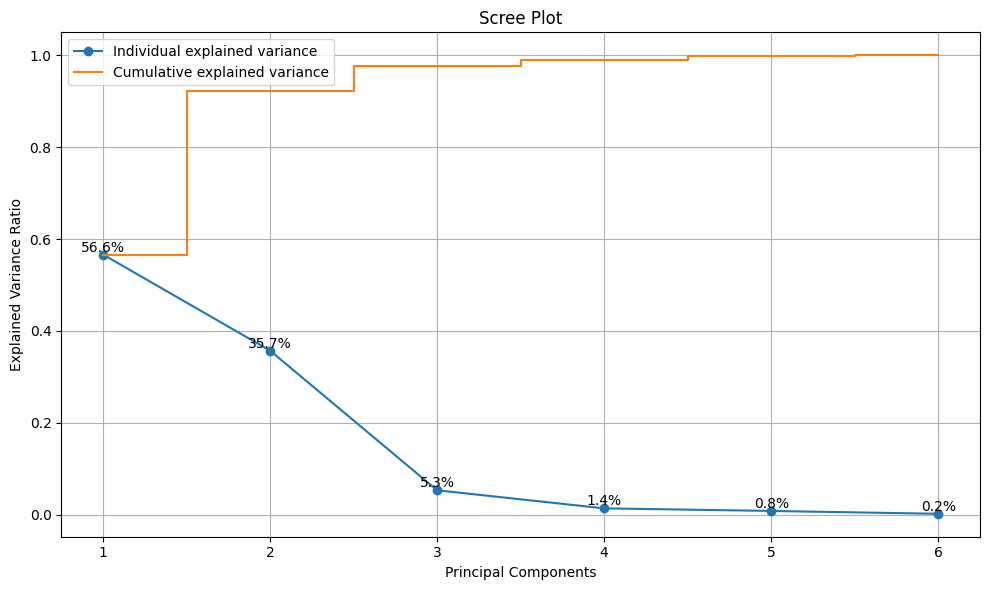

In [30]:
pca_obj, transformed_data, variance_ratio = perform_pca_analysis(df_num.values)

